# EMPIRICAL MACROECONOMICS
*Francesco Franco , Nova SBE*
## Class 1 Python warm-up on Sims Nobel lecture
Words in bold are commands to be typed in the Anaconda prompt.
### Setting up the class environment

1. Install [Anaconda](https://www.anaconda.com/). 
   - To check the conda version: **conda list anaconda$**
2. Create you work environment to be able to reproduce your work
   - to check the environments you have: **conda env list**
   - to create the Class environment: **conda create -n ClassEM python=3.6 notebook numpy pandas matplotlib xlrd statsmodels pandas-datareader seaborn**
   - to activate the environment: **conda activate ClassEM**
   - to deactivate the environment: **conda deactivate**
   - to list packages in your environment: **conda list -n ClassEM**
   - to export your packages in a list: **conda list --export > package-list.txt**
   - to create an environment with your packages: **conda create -n myenv --file package-list.txt**   


### Packages
We always start the code by importing
the required package into memory
 

In [1]:
import numpy as np                                       #import package for data array manipulation
import pandas as pd                                      #import package for data analysis         
from scipy.optimize import minimize                      #import package for scientific computing
import matplotlib.pyplot as plt                          #import package for plotting
from pandas_datareader.data import DataReader            # DataReader allows to download data from the main online
                                                         # repositories : Eurostat, FRED, OECD, ..
import seaborn as sns                                    # another fabulous package for plotting
from scipy.stats import multivariate_normal,norm, invgamma, uniform 

### Package Pandas: forget EXCEL
Help for common packages is accessible through the help tab of the Jupyter notebook: click Help

This section loads the data and present basic data manipulation commands

#### Loading and exploring data

In [2]:
# PANDAS_DATAREADER, simplest tool. we will see more advanced ways to download data using SDMX

start = '1929' #start date                                             
end = '1940' #end date
data = DataReader(['PCECCA','GPDICA','GCECA'], 'fred', start=start, end=end) #Data from FRED, you need to find the code in the website



In [3]:
data.info() # the info method gives you a lot of information 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 1929-01-01 to 1940-01-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCECCA  12 non-null     float64
 1   GPDICA  12 non-null     float64
 2   GCECA   12 non-null     float64
dtypes: float64(3)
memory usage: 384.0 bytes


In [4]:
data.head() # check the first 5 rows with method .head(). here index is date.

,PCECCA,GPDICA,GCECA
DATE,,,
1929-01-01,830.819,120.381,180.390
1930-01-01,786.314,81.988,198.685
1931-01-01,761.754,53.297,206.848
1932-01-01,693.556,19.658,200.225
1933-01-01,678.258,26.589,193.809


Let us create output
$$Y_t = C_t + I_t + G_t$$

In [5]:
haavelmo_data = data.copy() # create a new copy
haavelmo_data.columns = ['c', 'i', 'g'] # rename columns
haavelmo_data['y'] = haavelmo_data['c'] + haavelmo_data['g'] + haavelmo_data['i'] # create a new column with output

In [6]:
# of course you can read from files, csv are prefererd but almost any format is readable
# you need xlrd module for excel files 

df = pd.read_excel('../Data/Sims.xls')

In [7]:
df.info() # Check the data with the method .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    87 non-null     datetime64[ns]
 1   PCECCA  87 non-null     float64       
 2   GPDICA  87 non-null     float64       
 3   GCECA   87 non-null     float64       
 4   Y       87 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 KB


In [8]:
df.describe().T # Summary Statistics

,count,mean,std,min,25%,50%,75%,max
PCECCA,87.0,4144.621839,3248.228414,637.6,1371.10,3198.7,6219.7,11213.3
GPDICA,87.0,960.949425,859.241262,20.2,273.65,645.5,1422.7,2851.9
GCECA,87.0,1548.610345,884.163143,165.7,931.40,1488.0,2254.2,3091.4
Y,87.0,6654.181609,4938.393472,842.9,2694.65,5341.1,9886.8,16924.1


Notice that the Sims data are not identical to the one we can download today

In [9]:
df.head() # check the first 5 rows with method .head(). NOTICE indexing starts with 0 !

,date,PCECCA,GPDICA,GCECA,Y
0,1929-01-01,781.0,123.6,165.7,1070.3
1,1930-01-01,739.1,84.2,182.5,1005.8
2,1931-01-01,716.1,54.7,190.1,960.9
3,1932-01-01,651.9,20.2,184.2,856.3
4,1933-01-01,637.6,27.3,178.0,842.9


Selecting a column or a row : there are many ways to select a comun let us converge on one
let us reduce the data set to the first 5 rows

In [10]:
df5 = df.head().copy()

In [11]:
df5['PCECCA'] # select a column with the name

0    781.0
1    739.1
2    716.1
3    651.9
4    637.6
Name: PCECCA, dtype: float64

Purely integer-location based indexing for selection by position .iloc 
nice but you need to know the location

In [12]:
df5.iloc[1:3,0:4] # notice it starts from index 1 (row 2) up to index 2 but does not include index 3 same for columns

,date,PCECCA,GPDICA,GCECA
1,1930-01-01,739.1,84.2,182.5
2,1931-01-01,716.1,54.7,190.1


Purely label-location based indexer for selection by label .loc
can build very complex queries in your table

In [13]:
sel = (df5['date']>='1930-01-01') & (df5['date']<='1932-01-01') # logical operator &
df5.loc[sel,['date','GPDICA','Y']]

,date,GPDICA,Y
1,1930-01-01,84.2,1005.8
2,1931-01-01,54.7,960.9
3,1932-01-01,20.2,856.3


#### Operators
we have used a logical operator in the above selection
- $|$ :or
- & :and
- $>$ :gt
- $<$ :lt
- $>=$ :ge
- $<=$ :le
- $==$ :eq
- $!=$ :ne

In [14]:
df.columns # print the name of the columns

Index(['date', 'PCECCA', 'GPDICA', 'GCECA', 'Y'], dtype='object')

In [15]:
df.rename(columns={'Y': 'GDP'},inplace=True) # rename a column, attention to inplace

In [16]:
df.columns # print the name of the columns

Index(['date', 'PCECCA', 'GPDICA', 'GCECA', 'GDP'], dtype='object')

#### Built-in function

In [17]:
df['GDP'].sum() # as a method

578913.7999999999

In [18]:
sum(df['GDP']) # as a function (procedure)

578913.7999999999

#### Performance

In [19]:
%timeit -n 100 df['GDP'].sum()

149 µs ± 36.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit -n 100 sum(df['GDP'])

13.1 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Package Numpy: numerical operations


In [21]:
'''
if speed is really an issue, namely BIG dataset, or loops, then transform dataframe into numpy arrays
'''
GDP = np.array(df['GDP'])
%timeit -n 100 np.sum(GDP)

5.84 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Package Matplotlib: plot everything


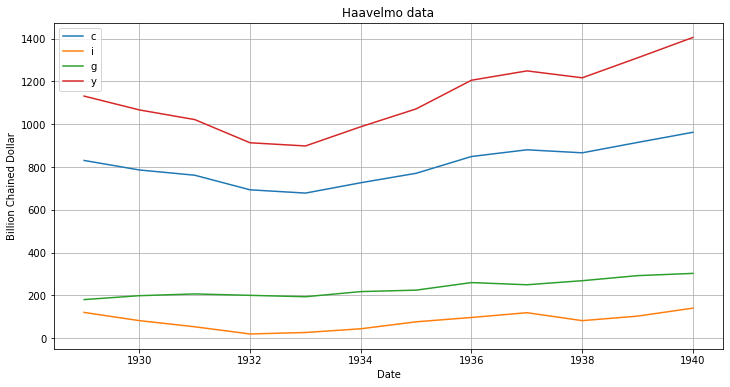

In [22]:
'''
plot Haavelmo data
'''
plt.figure(figsize=(12,6)) # declare a figure
plt.plot(haavelmo_data) # plot the data
plt.xlabel('Date') # add labels and title
plt.ylabel('Billion Chained Dollar')
plt.title('Haavelmo data')
plt.legend(haavelmo_data.columns) # add legend
plt.grid() # add a grid
plt.show()

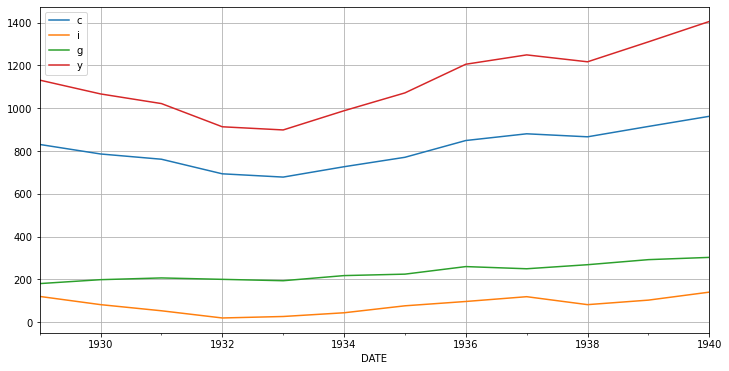

In [23]:
haavelmo_data.plot(grid=True,figsize=(12,6)) # Note that Panda as a plot method, slighlty less control but very practical
plt.show()

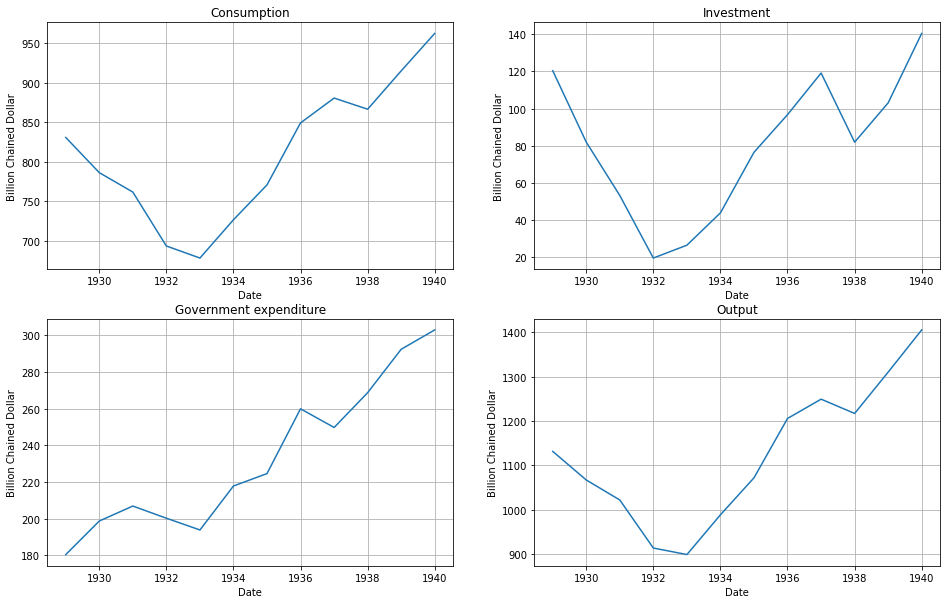

In [24]:
'''
Subplots
'''
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(haavelmo_data.c)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Consumption')
plt.grid()
plt.subplot(222)
plt.plot(haavelmo_data.i)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Investment')
plt.grid()
plt.subplot(223)
plt.plot(haavelmo_data.g)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Government expenditure')
plt.grid()
plt.subplot(224)
plt.plot(haavelmo_data.y)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Output')
plt.grid()
plt.show()


A panda dataframe as a plot methiod which is very powerful

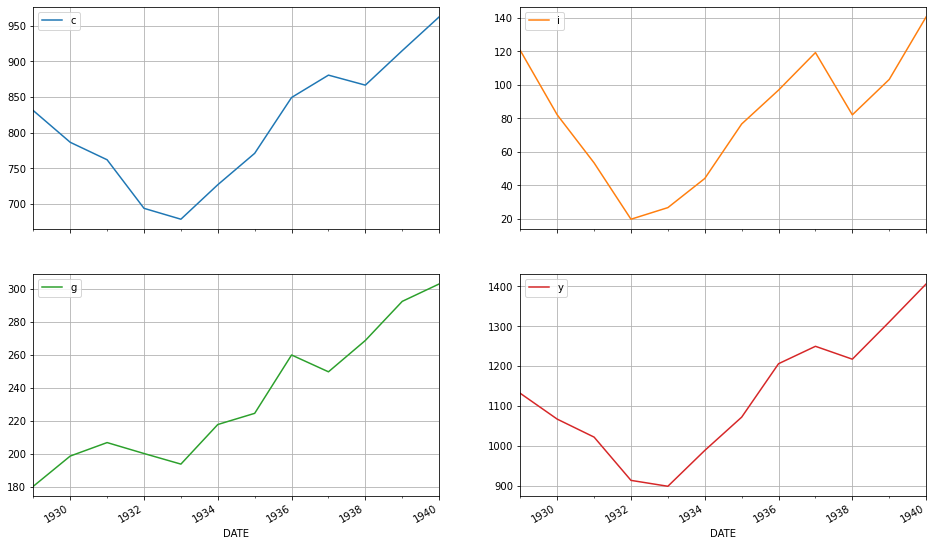

In [25]:
haavelmo_data.plot(subplots=True,layout=(2,2),figsize=(16,10),grid=True)
plt.show()

### Haavelmo model

> Haavelmo Statistical Testing of Business-Cycle Theories
The modified Haavelmo Model (Sims Nobel Lecture) is:


$$C_t = \beta + {\alpha}Y_t+\epsilon_t$$

$$I_t = \theta_0 + \theta_1(C_t - C_{t-1}) + \eta_t$$

$$Y_t = C_t + I_t + G_t$$

$$G_t = \gamma_0 + \gamma_1G_{t-1} + v_t$$

Where $\epsilon_t$,$\eta_t$, and $v_t$ are Normally distributed disturbance with constant variance and zero mean.  Substituting for $Y_t$ the system is therefore


\begin{equation}
C_{t}\left(1-\alpha\right)-{\alpha}I_t -{\alpha}G_t = \beta + \epsilon_t
\end{equation}

\begin{equation}
-\theta_1 C_{t}+I_{t}=\theta_0 -\theta_1 C_{t-1}+\eta_{t}
\end{equation}

\begin{equation}
G_t = \gamma_0 + \gamma_1G_{t-1} + v_t
\end{equation}

or in matrix terms

$${\Gamma_0}X_t = C + {\Gamma_1}X_{t-1} + U_t$$
where
$$\Gamma_0=\begin{pmatrix}
1-\alpha&-\alpha&-\alpha\\
-\theta_1&1&0\\
0&0&1
\end{pmatrix}$$

$$\Gamma_1=\begin{pmatrix}
0&0&0\\
-\theta_1&0&0\\
0&0&\gamma_1
\end{pmatrix}$$

$$C=\begin{pmatrix}
\beta\\
\theta_0\\
\gamma_0
\end{pmatrix}$$


The reduced form is
$$X_{t}=\Gamma_{0}^{-1}C+\Gamma_{0}^{-1}\Gamma_{1}X_{t-1}+\Gamma_{0}^{-1}U_{t}$$

$$X_{t}=A+BX_{t-1}+V_{t}$$


### Code for the Model
- Python is an “object-oriented programming language.” This means that part of the code is implemented using a special construct called classes.
- Python also allow a "a functional approach" which is the one we will follow in the course.
- Programmers use classes to keep related things together. This is done using the keyword “class,” which is a grouping of object-oriented constructs.
- A class is a code template for creating objects. Objects have member variables and have behaviour associated with them. In python a class is created by the keyword class. 
- A class by itself is of no use unless there is some functionality associated with it. Functionalities are defined by setting attributes, which act as containers for data and functions related to those attributes. Those functions are called methods.
- You can also provide the values for the attributes at runtime. This is done by defining the attributes inside the init method.

#### example of a class

In [26]:
# We define Haavelmo as class (base)
# The __init__ function is a special method that is run whenever an
# object is created. The self parameter is a reference to the current instance of the class.
class Haavelmo():
    
    def __init__(self,params=None):
               
        # Initialize parameters
        if params is not None:
            self.update(params)
            
    def update(self, params):
        
        # update the parameter values during estimation  
        self.alpha   = params[0]
        self.beta    = params[1]
        self.theta1  = params[2]
        self.theta0  = params[3]
        self.gamma1  = params[4]
        self.gamma0  = params[5]
        self.eps_std = params[6]
        self.eta_std = params[7]
        self.v_std   = params[8]    
        
    def Gamma_0(self):
        Gamma0 = np.array([
                          [1-self.alpha, -self.alpha, -self.alpha],
                          [-self.theta1, 1, 0],
                          [0, 0, 1],
                          ])    
        return Gamma0
    
    def C_(self):
        C = np.array([
                     [self.beta],
                     [self.theta0],
                     [self.gamma0],
                     ])        
        return C

    def Gamma_1(self):
        Gamma1 = np.array([
                          [0, 0, 0],
                          [-self.theta1, 0, 0],
                          [0, 0, self.gamma1],
                        ])       
        return Gamma1
    
    def VV_(self):
        VV = np.array([
                      [self.eps_std**2, 0, 0],
                      [0, self.eta_std**2, 0],
                      [0, 0, self.v_std**2],
                      ])
        return VV

#### example of a function
The likelihood is

$$f_{X^{T}}(X^{T};\psi)=f_{X_{0}}(X_{0};\psi)\prod_{t=1}^{T}f_{X_{t}|X_{t-1}}\left(X_{t}|X_{t-1};\psi\right)$$

Then the negative loglikelihood of our model is

$$\mathcal{L}(\psi)=-\left(Tn/2\right)+\left(T/2\right)log\left|\Gamma_{0}\right|^{2}-\left(T/2\right)log\left|D\right|-0.5\sum_{t=1}^{T}\left[\left(\Gamma_{0}X_{t}-C-\Gamma_{1}X_{t-1}\right)'D^{-1}\left(\Gamma_{0}X_{t}-C-\Gamma_{1}X_{t-1}\right)\right]$$

In [27]:
def neg_loglike(theta,endog,exog,constrained=False):
    
    '''Compute the negative of the likelihood of Haavelmo model
       
       Input
       theta:the initial guesses for the parameters
       endog:the endogenous variables
       exog:the exogenous variables (here the lagged endogenous variables)
       constrained version False or True
       
       Ouput
       negative loglikelihood
       
    '''
    params = theta
    mod = Haavelmo(params) # use the Haavelmo class
    Xhat = mod.Gamma_0()@endog
    U = Xhat - mod.C_() - mod.Gamma_1()@exog
    T = U.shape[1]
    n = U.shape[0]
    temp = np.zeros(T-1)    
    for t in range(0,T-1):
        temp[t] = U[:,t].transpose()@np.linalg.inv(mod.VV_())@U[:,t]        
    ll = ( -T*n/2*np.log(2*np.pi) + T/2*np.log(np.linalg.det(mod.Gamma_0())**2)
           -0.5*temp.sum() - T/2*np.log(np.linalg.det(mod.VV_())) )
    
    # IF you want to constrain the parameters 

    if constrained == True:
        ll = ( ll - 10000*min(0,1 -params[0]*(1+params[2]))**2
              - 10000*min(0,1.03 -params[4])**2 
              - 10000*min(0,params[2])**2
              - 10000*min(0,params[6])**2
              - 10000*min(0,params[7])**2
              - 10000*min(0,params[8])**2 )   
    return -ll

## Sims estimates

In [28]:
'''
Prepare the data X and X(-1) this would be the Haavelmo original sample according to Sims
'''
endog = np.array(df[['PCECCA','GPDICA','GCECA']]).T  
endog = endog[:,1:12] # drop first observation because of one lag

exog = np.array(df[['PCECCA','GPDICA','GCECA']].shift(1)).T      
exog = exog[:,1:12]   # drop first observation because of one lag

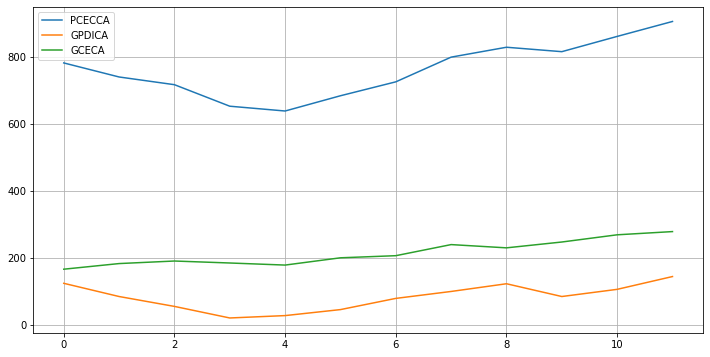

In [29]:
# Plot the series
df.iloc[0:12,1:4].plot(grid=True,figsize=(12,6))

In [30]:
#  Minimization of -LogLikelihood, constrained

# initial guesses        alpha  beta  theta1 theta0 gamma1 gamma0 eps_std eta_std v,,,,,,,,,,,,,,,,,,,_std        
theta_start = np.array([ 0.03, 0.5,  0.05,   0.5,  0.9,   0.2,     .1,   .1,     .1])
# Nelder-Mead, BFGS, 
res = minimize(neg_loglike, theta_start,args=(endog,exog,False),method="BFGS",
               options={'disp': True,'maxiter':1000})

         Current function value: 139.942034
         Iterations: 134
         Function evaluations: 1500
         Gradient evaluations: 150


In [31]:
# Estimated parameters

sol = pd.DataFrame(res.x,index=[r'$\alpha$',r'$\beta$', r'$\theta_1$',
                                r'$\theta_0$',r'$\gamma_1$',r'$\gamma_0$',
                                r'$\sigma_{\epsilon}$',r'$\sigma_{\eta}$',r'$\sigma_{\nu}$'],columns=['parameters'])
sol['SE']=np.sqrt(np.diagonal(res.hess_inv))
sol['T-stat']=sol['parameters']/sol['SE']
sol

,parameters,SE,T-stat
$\alpha$,0.558291,0.018405,30.334398
$\beta$,170.341501,17.955911,9.486653
$\theta_1$,-2.166872,0.602218,-3.598150
$\theta_0$,89.312051,12.891428,6.928018
$\gamma_1$,1.012246,0.104101,9.723705
$\gamma_0$,7.784550,22.576980,0.344800
$\sigma_{\epsilon}$,5.361692,0.033673,159.227966
$\sigma_{\eta}$,112.976453,0.017153,6586.334939
$\sigma_{\nu}$,12.893521,3.148497,4.095136


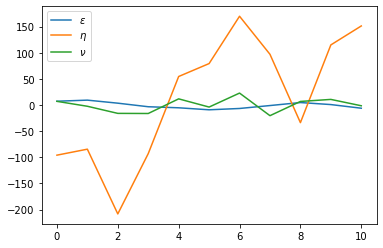

In [32]:
# Model specifications: autocorrelation of the residuals
params = res.x
mod = Haavelmo(params) 
Xhat = mod.Gamma_0()@endog
U = Xhat - mod.C_() - mod.Gamma_1()@exog
plt.plot(U.T)
plt.legend([r'$\epsilon$',r'$\eta$',r'$\nu$'])
plt.show()

## Estimation in growth rates

In [33]:
'''
Prepare the data X and X(-1) this would be the Haavelmo original sample
'''
endog_n = np.array(haavelmo_data[['c','i','g']]).T  
endog_n = endog_n[:,1:] # drop first observation because of one lag

exog_n = np.array(haavelmo_data[['c','i','g']].shift(1)).T      
exog_n = exog_n[:,1:]   # drop first observation because of one lag

In [34]:

'''
Prepare the data DlogX and DlogX(-1)
We will use the growth rate to be consistent with stationarity
'''

haavelmo_data['lc'] = np.log(haavelmo_data['c']) 
haavelmo_data['li'] = np.log(haavelmo_data['i'])
haavelmo_data['lg'] = np.log(haavelmo_data['g']) 

haavelmo_data['dlc'] = haavelmo_data['lc'] - haavelmo_data['lc'].shift(1)
haavelmo_data['dli'] = haavelmo_data['li'] - haavelmo_data['li'].shift(1)
haavelmo_data['dlg'] = haavelmo_data['lg'] - haavelmo_data['lg'].shift(1)

# you could normalize the data and 
#haavelmo_data['dlc'] = (haavelmo_data['dlc'] - haavelmo_data['dlc'].mean())/haavelmo_data['dlc'].std()
#haavelmo_data['dli'] = (haavelmo_data['dli'] - haavelmo_data['dli'].mean())/haavelmo_data['dli'].std()
#haavelmo_data['dlg'] = (haavelmo_data['dlg'] - haavelmo_data['dlg'].mean())/haavelmo_data['dlg'].std()

endog_g = np.array(haavelmo_data[['dlc','dli','dlg']]).T       
endog_g = endog_g[:,2:] # drop first 2 observations because of one lag

exog_g  = np.array(haavelmo_data[['dlc','dli','dlg']].shift(1)).T       
exog_g  = exog_g[:,2:]   # drop first 2 observations because of one lag

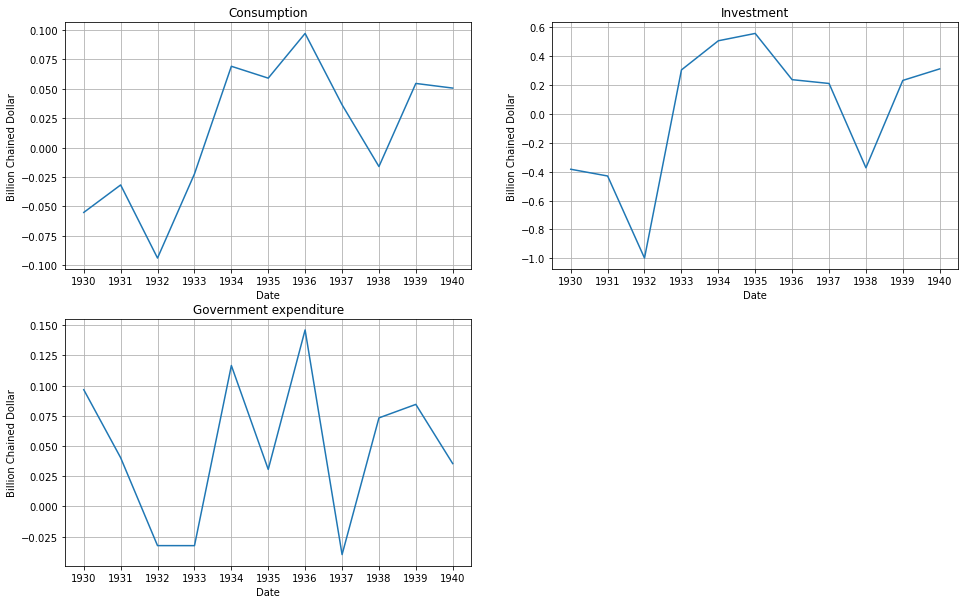

In [35]:
# Plot data in growth rate
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(haavelmo_data.dlc)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Consumption')
plt.grid()
plt.subplot(222)
plt.plot(haavelmo_data.dli)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Investment')
plt.grid()
plt.subplot(223)
plt.plot(haavelmo_data.dlg)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Government expenditure')
plt.grid()
plt.show()

### Minimization using Scipy package routines

In [36]:
'''Minimization of -LogLikelihood, constrained
'''
# initial guesses        alpha  beta  theta1 theta0 gamma1 gamma0 eps_std eta_std v,,,,,,,,,,,,,,,,,,,_std        
theta_start = np.array([ 0.03, 0.5,  0.05,   0.5,  0.9,   0.2,     .1,   .1,     .1])
# Nelder-Mead, BFGS, 
res2 = minimize(neg_loglike, theta_start,args=(endog_g,exog_g,True),method="BFGS",
               options={'disp': True,'maxiter':1000})

Optimization terminated successfully.
         Current function value: -30.556555
         Iterations: 60
         Function evaluations: 1170
         Gradient evaluations: 117


In [37]:
'''
Estimated parameters
'''
sol = pd.DataFrame(res2.x,index=[r'$\alpha$',r'$\beta$', r'$\theta_1$',
                                r'$\theta_0$',r'$\gamma_1$',r'$\gamma_0$',
                                r'$\sigma_{\epsilon}$',r'$\sigma_{\eta}$',r'$\sigma_{\nu}$'],columns=['parameters'])
sol['SE']=np.sqrt(np.diagonal(res2.hess_inv))
sol['T-stat']=sol['parameters']/sol['SE']
sol

,parameters,SE,T-stat
$\alpha$,0.091467,0.013249,6.903921
$\beta$,0.009050,0.007654,1.182374
$\theta_1$,-0.000017,0.007071,-0.002337
$\theta_0$,0.025474,0.150568,0.169185
$\gamma_1$,-0.308193,0.295803,-1.041886
$\gamma_0$,0.056559,0.023435,2.413414
$\sigma_{\epsilon}$,0.022759,0.005035,4.520306
$\sigma_{\eta}$,0.460053,0.102082,4.506713
$\sigma_{\nu}$,0.057892,0.013408,4.317844


Plot the residuals

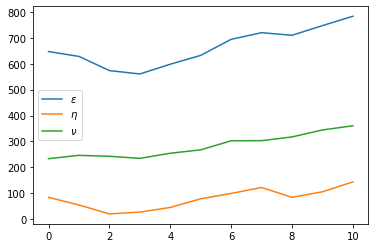

In [38]:
params = res2.x
mod = Haavelmo(params) 
Xhat = mod.Gamma_0()@endog
U = Xhat - mod.C_() - mod.Gamma_1()@exog
plt.plot(U.T)
plt.legend([r'$\epsilon$',r'$\eta$',r'$\nu$'])
plt.show()

Reminder to interpret the parameters

$$C_t = \beta + {\alpha}Y_t+\epsilon_t$$

$$I_t = \theta_0 + \theta_1(C_t - C_{t-1}) + \eta_t$$

$$Y_t = C_t + I_t + G_t$$

$$G_t = \gamma_0 + \gamma_1G_{t-1} + v_t$$

## Bayesian analysis

A nice and common way to highlight the differences between frequentist and bayesian analysis is to compare the confidence interval of frequentists with the corresponding notion in Bayesian statistics, credible interval.

- Confidence interval is from the frequentist's approach, where the parameter is fixed. The confidence interval is based on the repetition of the observations. A 95% confidence interval means that repeating the experiment to measure the parameter a large number of times and calculating the interval for each experiment, 95% of the intervals will contain the value of the parameter. This goes back to the fact that the data is random.


- Credible (or probability) interval stems from probabilities, that is, the Bayesian approach. This means that the parameter is random and we can say that, given the data, there is a 95% chance that the true value of the parameter is in the interval.

Markov chain Monte Carlo (MCMC) methods
In Bayesian statistics the parameters are not constant but random variables with a distribution. We are now looking for

$$\pi(\psi|X^T)= \frac{f_{X^T}(X^T|\psi)\pi(\psi)}{f_{X^T}(X^T)}$$

where the first term of the denominator on the RHS is the likelihood and the second the prior distribution of the parameters.The LHS is the posterior distribution and is the quantity of interest. MCMC methods allow to sample from ths posterior distribution.

One of the most simple algorithm to implement a MCMC is the Metropolis-Hastings algorithm. The idea is to construct a Markov chain for $\psi$

1. Given the current value of $\psi_{s-1}$, propose a new value $\psi^*$ selected from a proposal $q(\psi;\psi_{s-1})$

2. With probability $\alpha(\psi_{s-1},\psi^*)$ the proposed value is accepted if not the chain remains in place
now $$\alpha(\psi_{s-1},\psi^*) = min\Big({\frac{\pi(\psi^*|X^T)q(\psi^*;\psi_{s-1})}{\pi(\psi_{s-1}|X^T)q(\psi_{s-1};\psi^*)}},1\Big)$$

 $$  \alpha(\psi_{s-1},\psi^*)                                    = min\Big({\frac{f_{X^T}(X^T|\psi^*)\pi(\psi^*)q(\psi^*;\psi_{s-1})}{f_{X^T}(X_T|\psi_{s-1})\pi(\psi_{s-1})q(\psi_{s-1};\psi_{s-1}^*)}},1\Big)$$
 
 and using a proposal distribution that satistifes $q(\psi_{s-1};\psi_{s-1}^*)=q(\psi^*;\psi_{s-1})$. A convienent choice is
 
 $$\psi^*=\psi_{s-1} +\epsilon_s, \epsilon_s \sim{N(0,\Sigma_\epsilon)}$$

In [39]:
prior_alpha = uniform(loc=0, scale=10)   # Specify priors this is not an easy task, better to work with standardized data
prior_beta = uniform(loc=0, scale=10)
prior_theta1 = uniform(loc=0, scale=10)         
prior_theta0 = uniform(loc=0, scale=10)         
prior_gamma1 = uniform(loc=0, scale=10)         
prior_gamma0 = uniform(loc=0, scale=10) 
prior_eps_std = invgamma(5)
prior_eta_std = invgamma(5)
prior_v_std = invgamma(5)


rw_proposal = multivariate_normal(cov=res2.hess_inv*0.6)   # Specify the random walk proposal
                                                          # an important aspect: the initial covariance matrix is
                                                          # the inverse of the Hessian of likelihod and the parameter
                                                          # is set as to obtain a 25% acceptance rate


In [40]:
'''
Metropolis Hastings algorithm
'''

n_iterations = 20000
trace = np.zeros((n_iterations + 1, 9)) # Create storage arrays for the traces
trace_accepts = np.zeros(n_iterations)
trace[0] = [ 0.03, 0.5,  0.05,   0.5,  0.9,   0.2,     .1,   .1,     .1] # Initial values
# Iterations
for s in range(1, n_iterations + 1):
    proposed = trace[s-1] + rw_proposal.rvs() # step 1
    acceptance_probability = np.exp(-neg_loglike(proposed,endog_g,exog_g,True) +
                                    neg_loglike(trace[s-1],endog_g,exog_g,True) +
                                    prior_alpha.logpdf(proposed[0]) +
                                    prior_beta.logpdf(proposed[1]) + 
                                    prior_theta1.logpdf(proposed[2]) +
                                    prior_theta0.logpdf(proposed[3])+
                                    prior_gamma1.logpdf(proposed[4]) +
                                    prior_gamma0.logpdf(proposed[5])+
                                    prior_eps_std.logpdf(proposed[6]) + 
                                    prior_eps_std.logpdf(proposed[7]) +
                                    prior_eps_std.logpdf(proposed[8]) -
                                    prior_alpha.logpdf(trace[s-1, 0]) -
                                    prior_beta.logpdf(trace[s-1, 1]) -
                                    prior_theta1.logpdf(trace[s-1, 2]) -
                                    prior_theta0.logpdf(trace[s-1, 3])-
                                    prior_gamma1.logpdf(trace[s-1, 4]) -
                                    prior_gamma0.logpdf(trace[s-1, 5])-
                                    prior_eps_std.logpdf(trace[s-1, 6]) - 
                                    prior_eps_std.logpdf(trace[s-1, 7]) -
                                    prior_eps_std.logpdf(trace[s-1, 8])) # compute odd ratio
    pp = uniform.rvs()                                
    if acceptance_probability > pp: # step 2
        trace[s] = proposed
        trace_accepts[s-1] = 1
    else:
        trace[s] = trace[s-1]

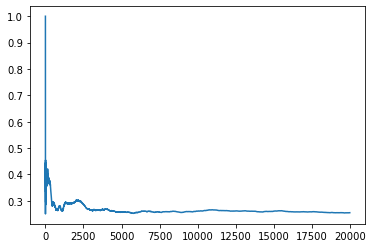

In [41]:
plt.plot(np.cumsum(trace_accepts)/np.arange(1, len(trace_accepts)+1)) # Plot the acceptance rate

Plot the estimated parameters and the traces

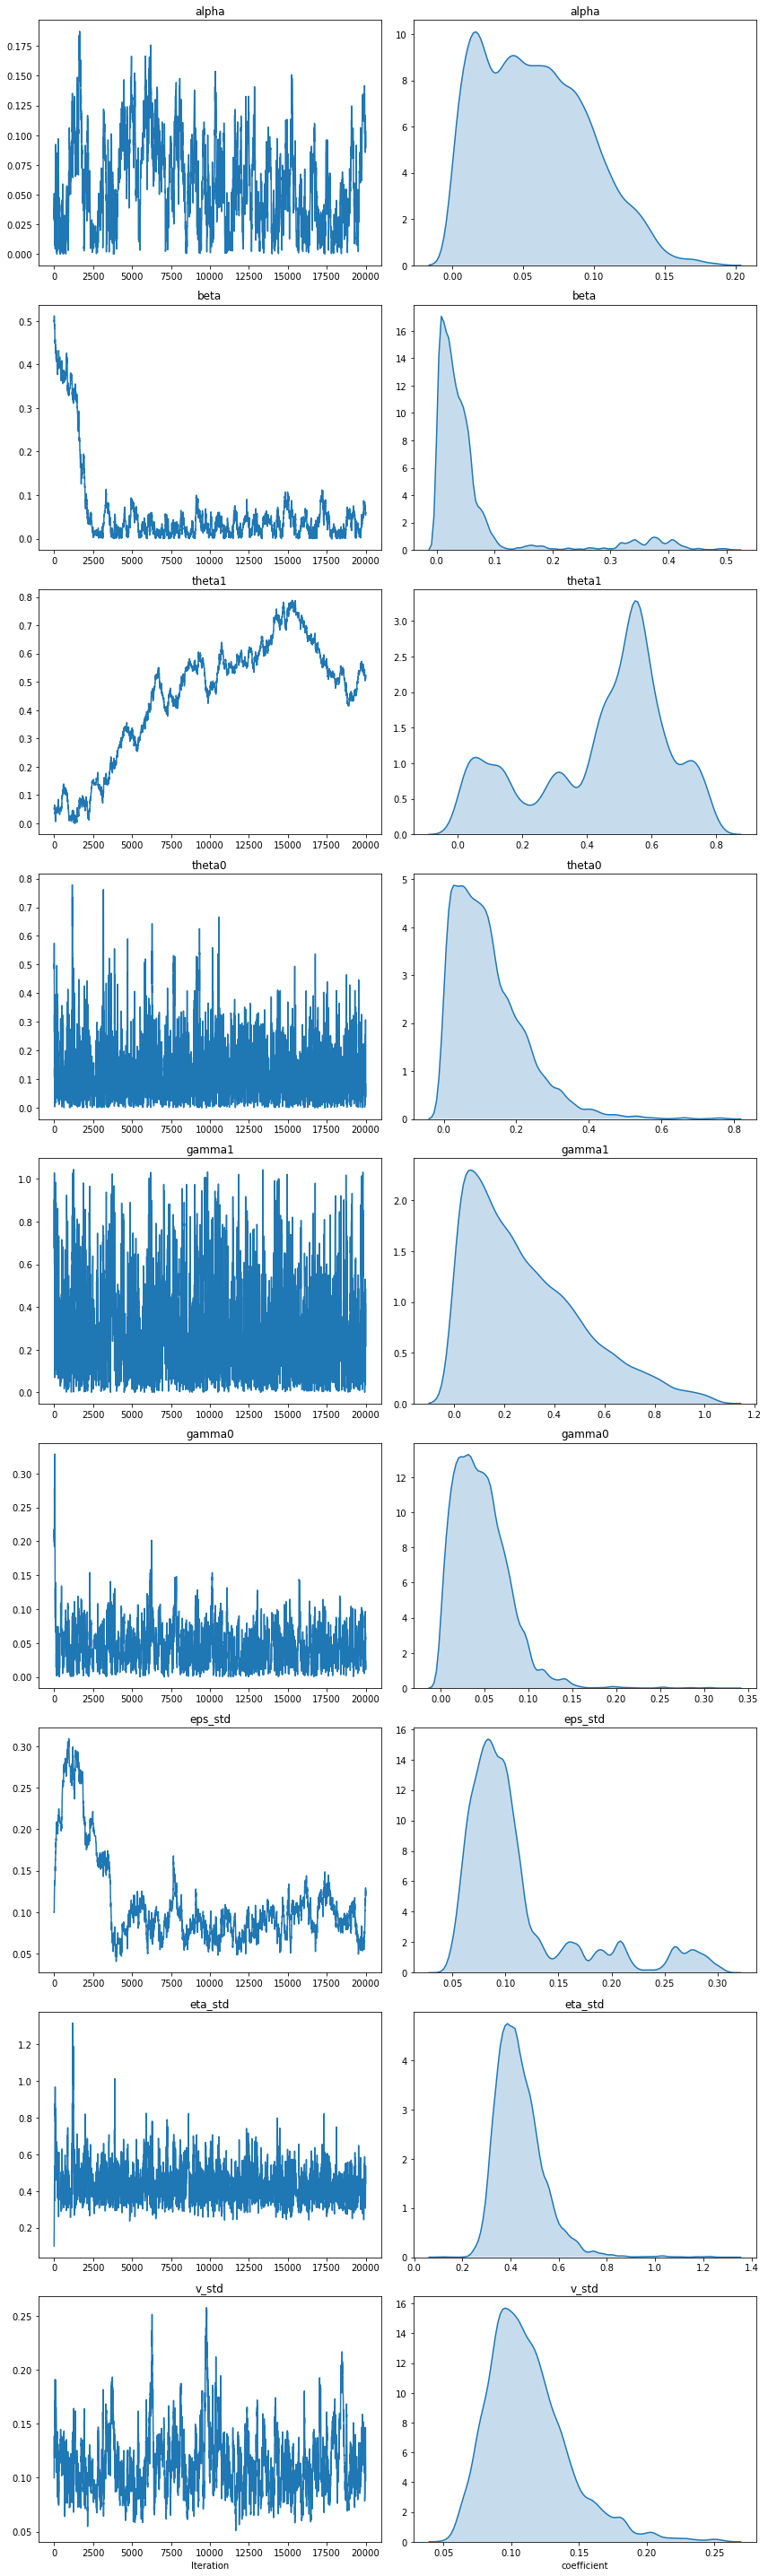

In [42]:
index=['alpha','beta', 'theta1','theta0','gamma1','gamma0','eps_std','eta_std','v_std']
fig, axes = plt.subplots(9, 2)
fig.set_size_inches(12, 40)
for i in range(9):
  axes[i][0].plot(trace[:,i])
  axes[i][0].title.set_text(str(index[i]))
  sns.kdeplot(trace[:,i], ax=axes[i][1], shade=True)
  axes[i][1].title.set_text(str(index[i]))
axes[9 - 1][0].set_xlabel("Iteration")
axes[9 - 1][1].set_xlabel("coefficient")
fig.tight_layout()
plt.show()